# Regression Model Validation - Lab

## Introduction

In this lab, you'll be able to validate your model using train-test-split.


## Objectives

You will be able to:

- Calculate the mean squared error (MSE) as a measure of predictive performance
- Validate the model using the test data


## Let's use our Boston Housing Data again!

This time, let's only include the variables that were previously selected using recursive feature elimination. We included the code to preprocess below.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_boston

boston = load_boston()

boston_features = pd.DataFrame(boston.data, columns = boston.feature_names)
b = boston_features["B"]

# log-scaling
logdis = np.log(boston_features["DIS"])
loglstat = np.log(boston_features["LSTAT"])

# min-max scaling
boston_features["B"] = (b-min(b))/(max(b)-min(b))
boston_features["DIS"] = (logdis-min(logdis))/(max(logdis)-min(logdis))

# standardization
boston_features["LSTAT"] = (loglstat-np.mean(loglstat))/np.sqrt(np.var(loglstat))

In [2]:
boston_features.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,0.542096,1.0,296.0,15.3,1.0,-1.275260
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,0.623954,2.0,242.0,17.8,1.0,-0.263711


In [3]:
X = boston_features[['CHAS', 'RM', 'DIS', 'B', 'LSTAT']]
y = y = pd.DataFrame(boston.target, columns= ["price"])

## Perform a train-test-split

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)
print(len(X_train), len(X_test), len(y_train), len(y_test))

379 127 379 127


## Apply your model to the train set

#### Importing and initializing the model class

In [19]:
from sklearn.linear_model import LinearRegression

#### Fitting the model to the train data

In [20]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

#### Calculating predictions on the train set, and on the test set

In [21]:
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

#### Calculating your residuals

In [22]:
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

#### Calculating the Mean Squared Error
A good way to compare overall performance is to compare the mean squarred error for the predicted values on the train and test sets.

In [23]:
# the easy way to calculate MSE
from sklearn.metrics import mean_squared_error
sk_mse_train = mean_squared_error(y_train, y_hat_train)
sk_mse_test = mean_squared_error(y_test, y_hat_test)
print('Mean Squared Error Training Set: ', round(sk_mse_train, 5))
print('Mean Squared Error Test Set:     ', round(sk_mse_test, 5))

Mean Squared Error Training Set:  21.45343
Mean Squared Error Test Set:      22.65833


In [24]:
# the hand-written way to calculate MSE
hand_mse_train = np.sum((y_train - y_hat_train)**2) / len(y_train)
hand_mse_test = np.sum((y_test - y_hat_test)**2) / len(y_test)
print('Mean Squared Error Training Set: ', round(hand_mse_train, 5))
print('Mean Squared Error Test Set:     ', round(hand_mse_test, 5))

Mean Squared Error Training Set:  price    21.45343
dtype: float64
Mean Squared Error Test Set:      price    22.65833
dtype: float64


If your test error is substantially worse then our train error, this is a sign that our model doesn't generalize well to future cases.

One simple way to demonstrate overfitting and underfitting is to alter the size of our train test split. By default, scikit learn's built in method allocates 25% of the data to the test set and 75% to the training set. Fitting a model on only 10% of the data is apt to lead to underfitting, while training a model on 99% of the data is apt to lead to overfitting.

# Evaluating the effect of train-test split size

Iterate over a range of train-test split sizes from .5 to .95. For each of these, generate a new train/test split sample. Fit a model to the training sample and calculate both the training error and the test error (mse) for each of these splits. Plot these two curves (train error vs. training size and test error vs. training size) on a graph.

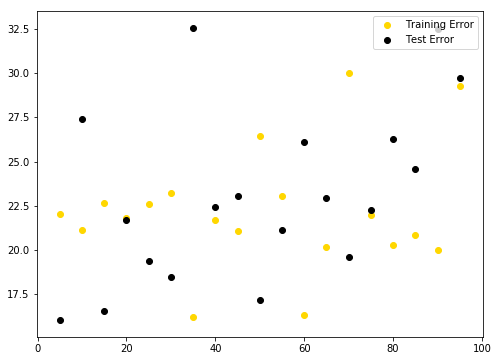

In [48]:
# import random and set a seed to repeat the exact outcome at any time
import random
random.seed(4)

# initialize empty lists to append the calculated errors
train_errors = []
test_errors = []

# initialize the test_size before to make plotting work
test_sizes = list(range(5, 100, 5))

# as the range function takes only integers, not floats, we have to pass in whole numbers
for i in test_sizes:
    
    # split the data, watchout: test-size has been given in as an int and will therefore diveded by 100
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=i/100)
    
    # fit the model to the train data
    linreg.fit(X_train, y_train)
    
    # calculate predictions 
    y_hat_train = linreg.predict(X_train)
    y_hat_test = linreg.predict(X_test)
    
    # calculate MSE and append it to the initialized lists
    train_errors.append(mean_squared_error(y_train, y_hat_train))
    test_errors.append(mean_squared_error(y_test, y_hat_test))
    
# plotting outside the loop
plt.figure(figsize=(8,6))
plt.scatter(x=test_sizes, y=train_errors, label='Training Error', color='gold')
plt.scatter(x=test_sizes, y=test_errors, label='Test Error', color='black')
plt.legend(loc=1)
plt.show();

# Evaluating the effect of train-test split size: extension

Repeat the previous example, but for each train-test split size, generate 100 iterations of models/errors and save the average train/test error. This will help account for any particularly good/bad models that might have resulted from poor/good splits in the data. 

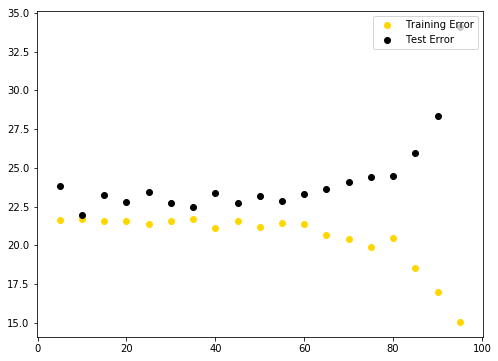

In [49]:
# import random and set a seed to repeat the exact outcome at any time
import random
random.seed(4)

# initialize empty lists to append the calculated errors for ALL iterations
train_errors = []
test_errors = []

# initialize the test_size before to make plotting work
test_sizes = list(range(5, 100, 5))

# as the range function takes only integers, not floats, we have to pass in whole numbers
for i in test_sizes:
    
    # initialize empty lists to append the calculated errors for ONE iteration
    iter_train_errors = []
    iter_test_errors = []
    
    for j in range(100):
        # split the data
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=i/100)
    
        # fit the model to the train data
        linreg.fit(X_train, y_train)
    
        # calculate predictions 
        y_hat_train = linreg.predict(X_train)
        y_hat_test = linreg.predict(X_test)
        
        # append MSE of ONE iteration
        iter_train_errors.append(mean_squared_error(y_train, y_hat_train))
        iter_test_errors.append(mean_squared_error(y_test, y_hat_test))
    
    # append mean MSE of each iteration into a complete list
    train_errors.append(np.mean(iter_train_errors))
    test_errors.append(np.mean(iter_test_errors))
    
# plotting outside the loop
plt.figure(figsize=(8,6))
plt.scatter(x=test_sizes, y=train_errors, label='Training Error', color='gold')
plt.scatter(x=test_sizes, y=test_errors, label='Test Error', color='black')
plt.legend(loc=1)
plt.show();

What's happening here? Evaluate your result!

* With more and more iterations the errors of test and train data drift away, meaning: overfitting!

##  Summary 

Congratulations! You now practiced your knowledge on MSE and on using train-test-split.